# Simple Linrear Reression 

### Importing Needed packages

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py
import numpy as np

### Reading Data

In [8]:
df = pd.read_csv("FuelConsumption.csv")
print(df)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

### Data Selection 

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Data Analysis 

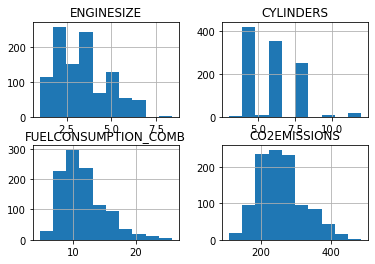

In [10]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

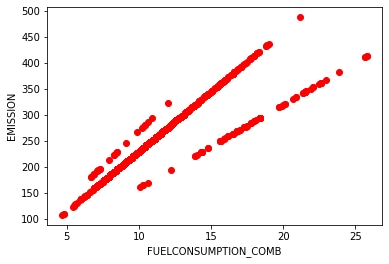

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSION")
plt.show()

In [6]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINSIZE')
plt.ylabel('EMISSION')
plt.show()

NameError: name 'cdf' is not defined

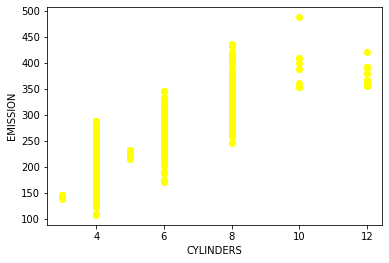

In [7]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color = 'yellow')
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSION')
plt.show()

In [13]:
x = np.random.rand(len(df))
print(x)
msk = x < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk, len(msk))
print(~msk, len(~msk))
print(train)
print(test)

[0.92488303 0.90033254 0.57116157 ... 0.45075377 0.67515452 0.96228028]
[False False  True ...  True  True False] 1067
[ True  True False ... False False  True] 1067
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
6            3.5          6                  10.1           232
8            3.7          6                  11.6           267
...          ...        ...                   ...           ...
1060         3.0          6                  11.5           264
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260

[857 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTI

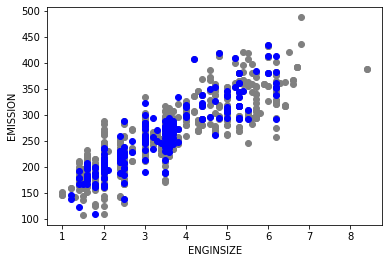

In [14]:
fig = plt.figure()
sp = fig.add_subplot(111)
sp.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'gray')
sp.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINSIZE')
plt.ylabel('EMISSION')
plt.show()

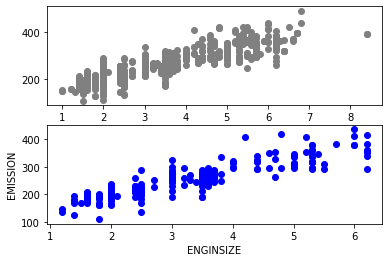

In [15]:
#test
fig = plt.figure()

sp1 = fig.add_subplot(211)
sp1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'gray')
sp2 = fig.add_subplot(212)
sp2.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINSIZE')
plt.ylabel('EMISSION')
plt.show()

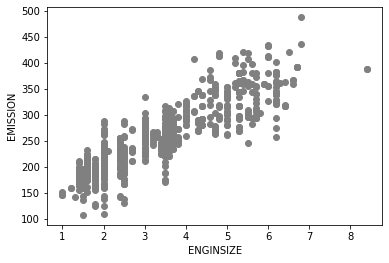

In [16]:
fig = plt.figure()
sp = fig.add_subplot(111)
sp.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'gray')
plt.xlabel('ENGINSIZE')
plt.ylabel('EMISSION')
plt.show()

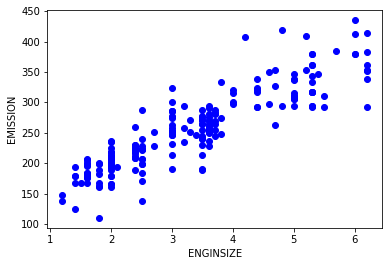

In [17]:
fig = plt.figure()
sp = fig.add_subplot(111)
sp.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINSIZE')
plt.ylabel('EMISSION')
plt.show()

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
rc = regr.coef_
ri = regr.intercept_
print('coefficients: ', rc)
print('Intrcept : ', ri)

coefficients:  [[38.30940288]]
Intrcept :  [127.97074775]


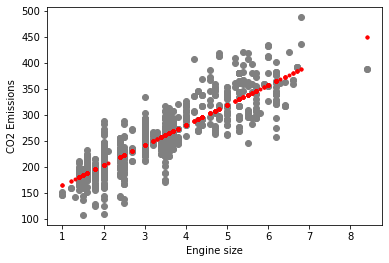

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'gray')
plt.plot(train_x, rc[0][0]*train_x + ri[0], '.r')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')
plt.show()

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict (test_x)

print('Mean = %.2f' % np.mean(np.absolute(test_y - test_y_)))
print('MSE = %.2f' % np.mean(np.absolute(test_y - test_y_)**2))
print('R2 = %.2f' % r2_score(test_y, test_y_))

Mean = 23.60
MSE = 967.21
R2 = 0.78
